## Multiclass Classification of EEG Brain Data using ANN and k-fold cross validation



In [0]:
import scipy.io
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping 
from tensorflow.keras import datasets
import matplotlib.pyplot as plt
from google.colab import drive
from google.colab import files

drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
def load_subject(sub):
  mat = scipy.io.loadmat('/content/drive/My Drive/ML4DM_data/'+sub+'.mat')
  T = int(mat['T'])
  N = int(mat['N'])
  categoryLabels = mat['categoryLabels'][0]
  X_3D = mat['X_3D'].T
  print("X_3D :", X_3D.shape)
  print("Category labels :", categoryLabels.shape)
  print("N = ", N)
  print("T = ", T)
  categoryLabels = categoryLabels - 1
  print(len(np.unique(categoryLabels)))

  return X_3D, categoryLabels, N, T

In [0]:
def kfold_multiclass(X_3D, categoryLabels, N, T, sub): 
  accuracies = dict.fromkeys(range(0, N))
  histories = dict.fromkeys(range(0, N))

  for time in range(N):
    data = X_3D[:, time, :]
    data = StandardScaler().fit_transform(data)
    pca = PCA(n_components=0.95)
    pca.fit(data)
    print("T = ", time, "Components = ", pca.n_components_)
    data_pca = pca.transform(data)
    y = (categoryLabels)
    X = data_pca
    classes = len(np.unique(categoryLabels))
    print(X.shape, y.shape)

    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
    cvscores = []
    for train, test in kfold.split(X, y):
      X_train, y_train = X[train], y[train]
      X_test, y_test = X[test], y[test]

      y_train = to_categorical(y_train)
      y_test = to_categorical(y_test)

      model = Sequential()
      model.add(Dense(int(pca.n_components_), activation='relu', input_shape=(X_train.shape[1], )))
      model.add(Dense(classes, activation='softmax'))

      opt = optimizers.Adam()
      esCallback = EarlyStopping(monitor='val_loss',
                             min_delta=0,
                             patience=0,
                             verbose=0,
                             mode='min')

      model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

      fit_history = model.fit(X_train, y_train, batch_size=64, epochs=100, validation_split=0.2, verbose = False, callbacks = [esCallback])
      scores = (model.evaluate(X_test, y_test, verbose = False))
      cvscores.append(scores[1] * 100)

    print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

    accuracies[time] = np.mean(cvscores)
    # np.save(sub+"_"+str(time)+"_multiclass_accuracy.npy", accuracies[time])
    # files.download(sub+"_"+str(time)+"_multiclass_accuracy.npy")
  np.save(sub+"_multiclass_accuracies.npy", accuracies)
  
  return accuracies


In [0]:
def run(subject):  
  X_3D, categoryLabels, N, T = load_subject(subject)
  a = kfold_multiclass(X_3D, categoryLabels, N, T, subject)

In [0]:
run('S1')

X_3D : (5188, 32, 124)
Category labels : (5188,)
N =  32
T =  5188
6
T =  0 Components =  52
(5188, 52) (5188,)
16.79% (+/- 1.54%)
T =  1 Components =  52
(5188, 52) (5188,)
16.35% (+/- 1.43%)
T =  2 Components =  52
(5188, 52) (5188,)
16.59% (+/- 1.47%)
T =  3 Components =  51
(5188, 51) (5188,)
16.52% (+/- 1.26%)
T =  4 Components =  51
(5188, 51) (5188,)
17.11% (+/- 1.22%)
T =  5 Components =  51
(5188, 51) (5188,)
17.90% (+/- 1.93%)
T =  6 Components =  51
(5188, 51) (5188,)
17.91% (+/- 1.34%)
T =  7 Components =  51
(5188, 51) (5188,)
17.98% (+/- 1.46%)
T =  8 Components =  52
(5188, 52) (5188,)
18.44% (+/- 1.74%)
T =  9 Components =  51
(5188, 51) (5188,)
23.30% (+/- 1.55%)
T =  10 Components =  50
(5188, 50) (5188,)
23.23% (+/- 1.33%)
T =  11 Components =  53
(5188, 53) (5188,)
24.13% (+/- 1.43%)
T =  12 Components =  52
(5188, 52) (5188,)
25.27% (+/- 1.74%)
T =  13 Components =  53
(5188, 53) (5188,)
24.00% (+/- 1.82%)
T =  14 Components =  55
(5188, 55) (5188,)
23.44% (+/- 1.5

In [0]:
run('S2')

X_3D : (5185, 32, 124)
Category labels : (5185,)
N =  32
T =  5185
6
T =  0 Components =  65
(5185, 65) (5185,)
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
16.99% (+/- 0.94%)
T =  1 Components =  65
(5185, 65) (5185,)
16.26% (+/- 1.31%)
T =  2 Components =  66
(5185, 66) (5185,)
17.33% (+/- 1.71%)
T =  3 Components =  66
(5185, 66) (5185,)
15.91% (+/- 1.46%)
T =  4 Components =  66
(5185, 66) (5185,)
17.29% (+/- 1.83%)
T =  5 Components =  66
(5185, 66) (5185,)
16.67% (+/- 1.82%)
T =  6 Components =  65
(5185, 65) (5185,)
15.82% (+/- 1.18%)
T =  7 Components =  65
(5185, 65) (5185,)
18.61% (+/- 1.31%)
T =  8 Components =  64
(5185, 64) (5185,)
19.54% (+/- 1.95%)
T =  9 Components =  64
(5185, 64) (5185,)
23.80% (+/- 1.28%)
T =  10 Components =  66
(5185, 66) (5185,)
24.55% (+/- 1.67%)
T =  11 Components =  67
(5185, 67) (5185,)
22.08% (+/- 1.78%)
T =  12 Components =  68
(5185, 68) (5185,)
21.21% (+/- 1.76%)
T =  13 Components =  69
(5185, 69) (5185

MessageError: ignored

In [0]:
files.download("/content/S2_multiclass_accuracies.npy")

In [0]:
plt.figure()
plt.title('S3')
plt.plot(a.keys(), a.values())
plt.xlabel("time stamp")
plt.ylabel("accuracy")
plt.show()

In [0]:
run('S1')

X_3D : (5188, 32, 124)
Category labels : (5188,)
N =  32
T =  5188
6
T =  0 Components =  52
(5188, 52) (5188,)
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
17.08% (+/- 1.06%)
T =  1 Components =  52
(5188, 52) (5188,)
15.61% (+/- 1.33%)
T =  2 Components =  52
(5188, 52) (5188,)
16.13% (+/- 1.53%)
T =  3 Components =  51
(5188, 51) (5188,)
16.82% (+/- 1.65%)
T =  4 Components =  51
(5188, 51) (5188,)
17.53% (+/- 1.75%)
T =  5 Components =  51
(5188, 51) (5188,)
17.56% (+/- 1.61%)
T =  6 Components =  51
(5188, 51) (5188,)
17.17% (+/- 1.23%)
T =  7 Components =  51
(5188, 51) (5188,)
17.96% (+/- 1.63%)
T =  8 Components =  52
(5188, 52) (5188,)
19.69% (+/- 1.43%)
T =  9 Components =  51
(5188, 51) (5188,)
21.95% (+/- 2.31%)
T =  10 Components =  50
(5188, 50) (5188,)
23.90% (+/- 1.09%)
T =  11 Components =  53
(5188, 53) (5188,)
23.39% (+/- 1.53%)
T =  12 Components =  52
(5188, 52) (5188,)
24.98% (+/- 1.55%)
T =  13 Components =  53
(5188, 53) (5188

In [0]:
files.download("/content/S1_multiclass_accuracies.npy")

In [0]:
run('S4')

X_3D : (5186, 32, 124)
Category labels : (5186,)
N =  32
T =  5186
6
T =  0 Components =  45
(5186, 45) (5186,)
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
16.62% (+/- 1.54%)
T =  1 Components =  44
(5186, 44) (5186,)
17.14% (+/- 0.86%)
T =  2 Components =  44
(5186, 44) (5186,)
17.66% (+/- 1.50%)
T =  3 Components =  43
(5186, 43) (5186,)
17.01% (+/- 0.72%)
T =  4 Components =  43
(5186, 43) (5186,)
17.76% (+/- 1.08%)
T =  5 Components =  44
(5186, 44) (5186,)
16.75% (+/- 2.11%)
T =  6 Components =  44
(5186, 44) (5186,)
16.41% (+/- 1.27%)
T =  7 Components =  44
(5186, 44) (5186,)
18.53% (+/- 1.44%)
T =  8 Components =  45
(5186, 45) (5186,)
19.13% (+/- 1.43%)
T =  9 Components =  44
(5186, 44) (5186,)
18.78% (+/- 1.33%)
T =  10 Components =  44
(5186, 44) (5186,)
23.97% (+/- 1.99%)
T =  11 Components =  44
(5186, 44) (5186,)
23.10% (+/- 1.40%)
T =  12 Components =  44
(5186, 44) (5186,)
22.66% (+/- 1.26%)
T =  13 Components =  45
(5186, 45) (5186

In [0]:
files.download("/content/S4_multiclass_accuracies.npy")

In [0]:
run('S5')

X_3D : (5185, 32, 124)
Category labels : (5185,)
N =  32
T =  5185
6
T =  0 Components =  63
(5185, 63) (5185,)
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
15.80% (+/- 2.10%)
T =  1 Components =  63
(5185, 63) (5185,)
16.24% (+/- 1.14%)
T =  2 Components =  62
(5185, 62) (5185,)
16.09% (+/- 1.16%)
T =  3 Components =  63
(5185, 63) (5185,)
16.56% (+/- 1.11%)
T =  4 Components =  63
(5185, 63) (5185,)
16.68% (+/- 1.65%)
T =  5 Components =  63
(5185, 63) (5185,)
16.57% (+/- 0.96%)
T =  6 Components =  63
(5185, 63) (5185,)
17.20% (+/- 1.63%)
T =  7 Components =  62
(5185, 62) (5185,)
19.48% (+/- 1.67%)
T =  8 Components =  61
(5185, 61) (5185,)
22.82% (+/- 2.31%)
T =  9 Components =  61
(5185, 61) (5185,)
29.03% (+/- 1.79%)
T =  10 Components =  62
(5185, 62) (5185,)
29.27% (+/- 2.58%)
T =  11 Components =  62
(5185, 62) (5185,)
27.96% (+/- 2.52%)
T =  12 Components =  62
(5185, 62) (5185,)
28.56% (+/- 2.19%)
T =  13 Components =  64
(5185, 64) (5185

In [0]:
files.download("/content/S5_multiclass_accuracies.npy")

### Results

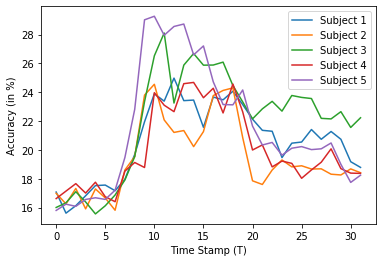

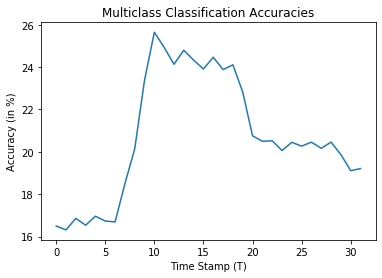

In [0]:
plt.figure()
accuracies = np.zeros((32, 1))
for i in range(1, 6):
 
  acc = np.load("/content/drive/My Drive/ML4DM_data/Results/S"+str(i)+"_multiclass_accuracies.npy", allow_pickle=True)
  acc = acc.item()
  accuracies += np.asarray(list(acc.values())).reshape(-1, 1)
  plt.plot(list(acc.keys()), list(acc.values()), label = "Subject "+str(i))
plt.xlabel("Time Stamp (T)")
plt.ylabel("Accuracy (in %)")
plt.legend(loc = 0)
plt.show()

  
# print((accuracies))
plt.figure()
plt.title('Multiclass Classification Accuracies')
plt.plot(list(acc.keys()), accuracies/5)
plt.xlabel("Time Stamp (T)")
plt.ylabel("Accuracy (in %)")
# plt.savefig("S3_binary.png", dpi = 300)
plt.show()